In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
# load data
# due to sensivity of the dataset, it is not included in the data repository
# please download from brightspace
data = pd.read_csv('Data_IER_2022.csv', delimiter=',', encoding='latin1', na_values='NA', index_col='ID')

In [3]:
# take a look at the data
data.head()

,year,gender,bmi,living,stap_est,erv_fa_sub1_q,erv_fa_sub2_q,erv_fa,dag_zwa1,tijd_zwa1_uur,...,ipaqtot2,tijd_zit2_uur,tijd_zit2_min,wear_1,wear_2,wear_3,wear_4,wear_5,wear_6,wear_7
ID,,,,,,,,,,,,,,,,,,,,,
1,2019,Female,18.0,Moved_out,NaN,3.0,2.0,2.5,2.0,2.0,...,NaN,7.0,30.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,2019,Female,24.9,Moved_out,5000.0,1.0,2.0,1.5,0.0,NaN,...,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,2019,Female,21.8,Moved_out,6500.0,6.0,2.0,4.0,2.0,1.0,...,9795.0,9.0,NaN,Yes,Yes,No,Yes,No,Yes,Yes
4,2019,Female,18.7,Living_with_parents,5000.0,1.0,2.0,1.5,1.0,1.0,...,744.0,10.0,NaN,Yes,Yes,Yes,No,Yes,Yes,Yes
5,2019,Male,27.8,Living_with_parents,NaN,7.0,7.0,7.0,5.0,2.0,...,NaN,4.0,NaN,No,No,No,No,Yes,Yes,Yes


In [4]:
data.soc_omg_tot.std()

1.1274206585123516

In [5]:
# print some info of the data
data.info()
print("The shape of the data is", data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 1 to 290
Columns: 102 entries, year to wear_7
dtypes: float64(70), int64(1), object(31)
memory usage: 233.4+ KB
The shape of the data is (290, 102)


In [6]:
# print some descriptive statistics
data.describe()

,year,bmi,stap_est,erv_fa_sub1_q,erv_fa_sub2_q,erv_fa,dag_zwa1,tijd_zwa1_uur,tijd_zwa1_min,dag_mat1,...,tijd_zwa2_min,dag_mat2,tijd_mat2_uur,tijd_mat2_min,dag_wan2,tijd_wan2_uur,tijd_wan2_min,ipaqtot2,tijd_zit2_uur,tijd_zit2_min
count,290.000000,278.000000,264.000000,286.000000,286.000000,286.000000,285.000000,227.000000,197.000000,284.000000,...,142.000000,268.000000,203.000000,198.000000,268.000000,176.000000,216.000000,240.000000,259.000000,122.000000
mean,2020.010345,21.258957,5763.121212,4.129371,4.006993,4.068182,2.014035,1.211454,19.269036,4.753521,...,21.330986,4.373134,1.583744,22.358586,4.022388,1.346591,23.226852,3272.776667,7.783784,7.270492
std,0.812891,2.331746,2146.115991,1.646062,1.489126,1.440541,1.482223,0.769583,15.218266,1.876719,...,15.095310,2.034061,4.788123,14.401343,2.192826,3.799141,12.856974,3223.598739,3.245684,13.581731
min,2019.000000,16.600000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,19.700000,5000.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,3.000000,...,0.000000,3.000000,0.000000,15.000000,2.000000,0.000000,15.000000,1428.000000,6.000000,0.000000
50%,2020.000000,21.000000,6000.000000,4.000000,4.000000,4.000000,2.000000,1.000000,30.000000,5.000000,...,30.000000,5.000000,1.000000,30.000000,4.000000,0.000000,20.000000,2421.750000,7.000000,0.000000
75%,2021.000000,22.600000,7000.000000,5.000000,5.000000,5.000000,3.000000,1.000000,30.000000,6.000000,...,30.000000,6.000000,1.000000,30.000000,6.000000,1.000000,30.000000,3861.250000,9.000000,0.000000
max,2021.000000,32.000000,14000.000000,7.000000,7.000000,7.000000,7.000000,8.000000,50.000000,7.000000,...,60.000000,7.000000,50.000000,50.000000,7.000000,30.000000,50.000000,26640.000000,40.000000,45.000000


In [7]:
# print a list of the columns/features
print(data.columns)

Index(['year', 'gender', 'bmi', 'living', 'stap_est', 'erv_fa_sub1_q',
       'erv_fa_sub2_q', 'erv_fa', 'dag_zwa1', 'tijd_zwa1_uur',
       ...
       'ipaqtot2', 'tijd_zit2_uur', 'tijd_zit2_min', 'wear_1', 'wear_2',
       'wear_3', 'wear_4', 'wear_5', 'wear_6', 'wear_7'],
      dtype='object', length=102)


In [8]:
# drop columns that we do not need
data = data.drop(columns = ['gender', 'living', 'erv_fa_sub1_q', 'erv_fa_sub2_q', 'systeem', 
                            'attitu_1', 'attitu_2', 'soc_omg_1', 'soc_omg_2', 'comment_app_1', 
                            'comment_app_2', 'comment_app_3', 'comment_app_4','comment_app_5', 
                            'comment_app_6', 'comment_app_7', 'reden_1', 'reden_2', 'reden_3', 
                            'reden_4', 'reden_5', 'reden_6', 'reden_7', 'locatie_1', 'locatie_2', 
                            'locatie_3', 'locatie_4', 'locatie_5', 'locatie_6', 'locatie_7', 
                            'wear_1', 'wear_2', 'wear_3', 'wear_4', 'wear_5', 'wear_6', 'wear_7'])

In [9]:
# data = data.fillna(data.median())
data = data.dropna(subset=['attitu_tot', 'erv_fa'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 1 to 289
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               285 non-null    int64  
 1   bmi                278 non-null    float64
 2   stap_est           264 non-null    float64
 3   erv_fa             285 non-null    float64
 4   dag_zwa1           285 non-null    float64
 5   tijd_zwa1_uur      227 non-null    float64
 6   tijd_zwa1_min      197 non-null    float64
 7   dag_mat1           284 non-null    float64
 8   tijd_mat1_uur      213 non-null    float64
 9   tijd_mat1_min      220 non-null    float64
 10  dag_wan1           285 non-null    float64
 11  tijd_wan1_uur      190 non-null    float64
 12  tijd_wan1_min      231 non-null    float64
 13  ipaqtot1           258 non-null    float64
 14  tijd_zit1_uur      278 non-null    float64
 15  tijd_zit1_min      138 non-null    float64
 16  attitu_tot         285 non

In [10]:
# check whether the columns have NaN values
print(data.isna().any().any())

True


In [11]:
data = data \
    .assign(tijd_zwa1 = data.tijd_zwa1_uur * 60 + data.tijd_zwa1_min,
            tijd_zwa2 = data.tijd_zwa2_uur * 60 + data.tijd_zwa2_min,
            tijd_mat1 = data.tijd_mat1_uur * 60 + data.tijd_mat1_min,
            tijd_mat2 = data.tijd_mat2_uur * 60 + data.tijd_mat2_min,
            tijd_wan1 = data.tijd_wan1_uur * 60 + data.tijd_wan1_min,
            tijd_wan2 = data.tijd_wan2_uur * 60 + data.tijd_wan2_min,
            tijd_zit1 = data.tijd_zit1_uur * 60 + data.tijd_zit1_min,
            tijd_zit2 = data.tijd_zit2_uur * 60 + data.tijd_zit2_min)
            
data = data.drop(columns = ['tijd_zwa1_uur', 'tijd_zwa1_min', 'tijd_zwa2_uur', 'tijd_zwa2_min', 'tijd_mat1_uur', 
                     'tijd_mat1_min', 'tijd_mat2_uur', 'tijd_mat2_min', 'tijd_wan1_uur', 'tijd_wan1_min', 
                     'tijd_wan2_uur', 'tijd_wan2_min', 'tijd_zit1_uur', 'tijd_zit1_min', 'tijd_zit2_uur',
                     'tijd_zit2_min'])

data.to_csv('data_clean.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 1 to 289
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               285 non-null    int64  
 1   bmi                278 non-null    float64
 2   stap_est           264 non-null    float64
 3   erv_fa             285 non-null    float64
 4   dag_zwa1           285 non-null    float64
 5   dag_mat1           284 non-null    float64
 6   dag_wan1           285 non-null    float64
 7   ipaqtot1           258 non-null    float64
 8   attitu_tot         285 non-null    float64
 9   soc_omg_tot        285 non-null    float64
 10  stap_app_1_aantal  237 non-null    float64
 11  stap_app_2_aantal  236 non-null    float64
 12  stap_app_3_aantal  237 non-null    float64
 13  stap_app_4_aantal  236 non-null    float64
 14  stap_app_5_aantal  236 non-null    float64
 15  stap_app_6_aantal  237 non-null    float64
 16  stap_app_7_aantal  237 non

In [12]:
# slice data by year so that we can work with it later
# create new dataframe for year 2019 only
data_2019 = data[data.year==2019]
data_2019.to_csv('data_2019.csv')
data_2019.head()

,year,bmi,stap_est,erv_fa,dag_zwa1,dag_mat1,dag_wan1,ipaqtot1,attitu_tot,soc_omg_tot,...,dag_wan2,ipaqtot2,tijd_zwa1,tijd_zwa2,tijd_mat1,tijd_mat2,tijd_wan1,tijd_wan2,tijd_zit1,tijd_zit2
ID,,,,,,,,,,,,,,,,,,,,,
1,2019,18.0,NaN,2.5,2.0,7.0,7.0,NaN,6.0,5.0,...,2.0,NaN,120.0,120.0,NaN,60.0,30.0,15.0,NaN,450.0
2,2019,24.9,5000.0,1.5,0.0,7.0,7.0,NaN,5.5,4.5,...,0.0,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,21.8,6500.0,4.0,2.0,7.0,6.0,4308.0,6.0,4.5,...,7.0,9795.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,18.7,5000.0,1.5,1.0,5.0,5.0,2010.0,6.0,3.0,...,4.0,744.0,NaN,30.0,NaN,15.0,NaN,20.0,NaN,NaN
5,2019,27.8,NaN,7.0,5.0,1.0,0.0,NaN,7.0,7.0,...,3.0,NaN,150.0,NaN,60.0,NaN,NaN,NaN,0.0,NaN


In [13]:
# create new dataframe for year 202- only
data_2020 = data[data.year==2020]
data_2020.to_csv('data_2020.csv')
data_2020.head()

,year,bmi,stap_est,erv_fa,dag_zwa1,dag_mat1,dag_wan1,ipaqtot1,attitu_tot,soc_omg_tot,...,dag_wan2,ipaqtot2,tijd_zwa1,tijd_zwa2,tijd_mat1,tijd_mat2,tijd_wan1,tijd_wan2,tijd_zit1,tijd_zit2
ID,,,,,,,,,,,,,,,,,,,,,
95,2020,20.6,2500.0,3.0,1.0,5.0,4.0,1584.0,4.0,4.5,...,2.0,732.0,90.0,NaN,30.0,30.0,20.0,20.0,360.0,360.0
96,2020,21.5,6000.0,6.0,3.0,4.0,4.0,2876.0,6.0,4.0,...,4.0,696.0,90.0,30.0,NaN,15.0,NaN,30.0,NaN,NaN
97,2020,20.0,5000.0,2.5,4.0,5.0,6.0,4314.0,5.5,5.5,...,3.0,1377.0,60.0,90.0,90.0,30.0,30.0,30.0,NaN,NaN
98,2020,23.8,4000.0,5.0,2.0,1.0,0.0,1200.0,6.0,5.0,...,0.0,1200.0,60.0,30.0,60.0,60.0,NaN,NaN,240.0,580.0
99,2020,18.5,5000.0,1.5,0.0,3.0,5.0,1350.0,3.5,3.0,...,4.0,956.0,NaN,20.0,NaN,25.0,NaN,NaN,NaN,NaN


In [14]:
# create new dataframe for year 2021 only
data_2021 = data[data.year==2021]
# uncomment to reset index
# data_2021 = data_2021.reset_index().drop(columns = ['ID'])
data_2021.to_csv('data_2021.csv')
data_2021

,year,bmi,stap_est,erv_fa,dag_zwa1,dag_mat1,dag_wan1,ipaqtot1,attitu_tot,soc_omg_tot,...,dag_wan2,ipaqtot2,tijd_zwa1,tijd_zwa2,tijd_mat1,tijd_mat2,tijd_wan1,tijd_wan2,tijd_zit1,tijd_zit2
ID,,,,,,,,,,,,,,,,,,,,,
194,2021,26.3,1000.0,3.5,2.0,4.0,7.0,4586.0,5.5,2.5,...,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,510.0,NaN
195,2021,19.4,4000.0,5.0,6.0,7.0,7.0,12230.0,6.5,3.5,...,2.0,4278.0,90.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN
196,2021,21.0,5000.0,4.5,3.0,4.0,2.0,3492.0,7.0,6.0,...,6.0,NaN,120.0,20.0,30.0,3000.0,20.0,120.0,360.0,360.0
197,2021,22.4,10000.0,5.0,1.0,6.0,7.0,5706.0,4.0,2.0,...,3.0,2605.5,90.0,30.0,150.0,60.0,60.0,45.0,240.0,150.0
198,2021,21.8,4000.0,1.5,2.0,5.0,7.0,6967.5,5.0,3.5,...,7.0,13917.0,180.0,300.0,60.0,120.0,125.0,270.0,720.0,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2021,NaN,6000.0,5.0,1.0,7.0,7.0,NaN,7.0,4.5,...,7.0,11637.0,70.0,75.0,NaN,150.0,135.0,270.0,510.0,300.0
286,2021,25.0,6800.0,4.0,1.0,1.0,5.0,2430.0,4.0,5.5,...,2.0,6612.0,120.0,NaN,120.0,NaN,60.0,NaN,360.0,NaN
287,2021,19.3,5000.0,4.0,2.0,5.0,6.0,2436.0,4.5,4.0,...,2.0,4674.0,90.0,NaN,NaN,NaN,NaN,90.0,NaN,NaN


In [15]:
# calculate the average samples per year
average_samples_per_year = np.array([data[data.year==2019].index.size, data[data.year==2020].index.size, data[data.year==2021].index.size]).mean()
print("On average, there were", average_samples_per_year.round(2), "samples per year.")

On average, there were 95.0 samples per year.


In [16]:
print('Peformance statistics 2019')
print(data_2019.erv_fa.describe())
print()

print('Peformance statistics 2020')
print(data_2020.erv_fa.describe())
print()

print('Peformance statistics 2021')
print(data_2021.erv_fa.describe())
print()

Peformance statistics 2019
count    93.000000
mean      4.295699
std       1.502238
min       0.500000
25%       3.500000
50%       4.500000
75%       5.500000
max       7.000000
Name: erv_fa, dtype: float64

Peformance statistics 2020
count    99.000000
mean      3.792929
std       1.360916
min       0.000000
25%       3.000000
50%       3.500000
75%       5.000000
max       6.500000
Name: erv_fa, dtype: float64

Peformance statistics 2021
count    93.000000
mean      4.139785
std       1.433993
min       1.000000
25%       3.000000
50%       4.500000
75%       5.500000
max       7.000000
Name: erv_fa, dtype: float64



In [17]:
print('Attitude statistics 2019')
print(data_2019.attitu_tot.describe())
print()

print('Attitude statistics 2020')
print(data_2020.attitu_tot.describe())
print()

print('Attitude statistics 2021')
print(data_2021.attitu_tot.describe())
print()

Attitude statistics 2019
count    93.000000
mean      5.827957
std       0.864438
min       3.500000
25%       5.000000
50%       6.000000
75%       6.500000
max       7.000000
Name: attitu_tot, dtype: float64

Attitude statistics 2020
count    99.000000
mean      5.570707
std       0.950322
min       3.500000
25%       5.000000
50%       5.500000
75%       6.000000
max       7.000000
Name: attitu_tot, dtype: float64

Attitude statistics 2021
count    93.000000
mean      5.682796
std       1.185934
min       0.000000
25%       5.000000
50%       6.000000
75%       6.500000
max       7.000000
Name: attitu_tot, dtype: float64



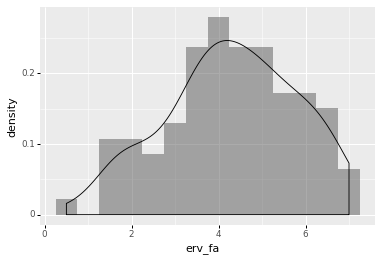

<ggplot: (672978309)>

In [18]:
ggplot(data_2019, aes('erv_fa')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

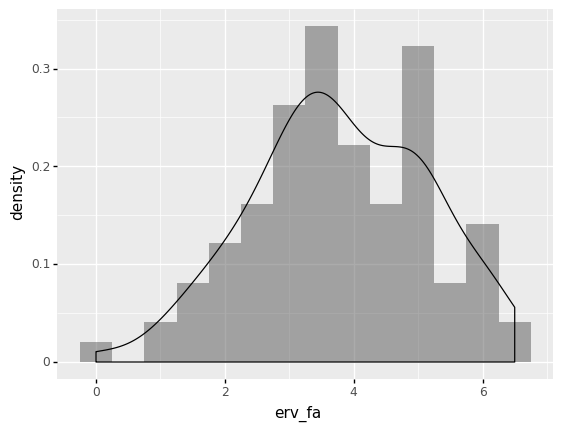

<ggplot: (672981285)>

In [19]:
ggplot(data_2020, aes('erv_fa')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

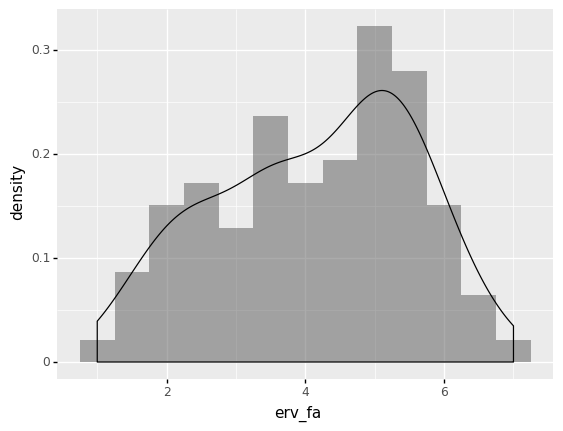

<ggplot: (673107345)>

In [20]:
ggplot(data_2021, aes('erv_fa')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

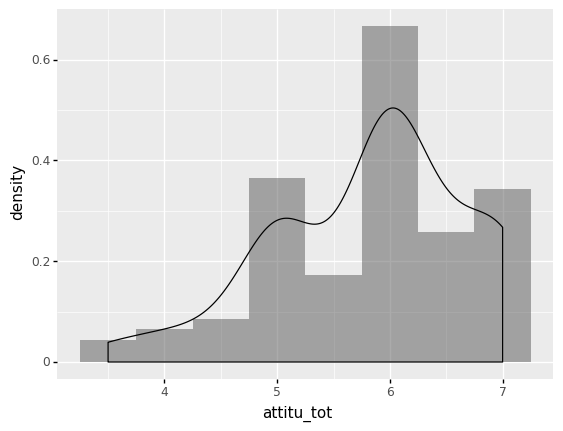

<ggplot: (673134544)>

In [21]:
ggplot(data_2019, aes('attitu_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

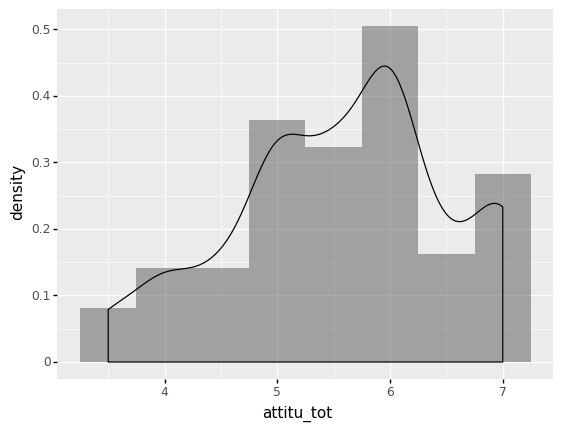

<ggplot: (673168231)>

In [22]:
ggplot(data_2020, aes('attitu_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

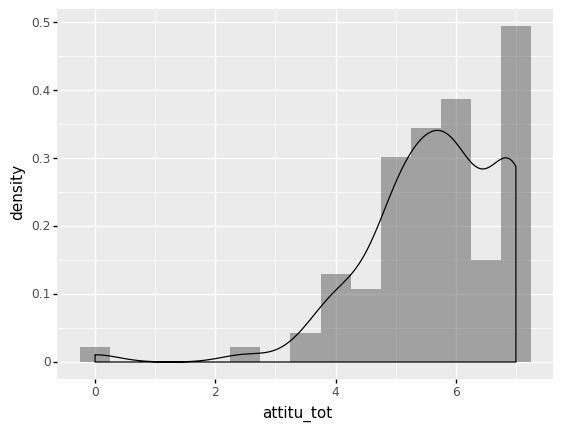

<ggplot: (673211772)>

In [23]:
ggplot(data_2021, aes(data_2021['attitu_tot'])) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

In [24]:
def check_normality(data):
    test_stat_normality, p_value_normality = sp.stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

print('PERCEPTION DATA')
print()

print('Checking normality of the perception data in 2019')
check_normality(data_2019.erv_fa.to_numpy())
print()

print('Checking normality of the perception data in 2020')
check_normality(data_2020.erv_fa.to_numpy())
print()

print('Checking normality of the perception data in 2021')
check_normality(data_2021.erv_fa.to_numpy())
print()

print('ATTITUDE DATA')
print()

print('Checking normality of the attitude data in 2019')
check_normality(data_2019.attitu_tot.to_numpy())
print()

print('Checking normality of the attitude data in 2020')
check_normality(data_2020.attitu_tot.to_numpy())
print()

print('Checking normality of the attitude data in 2021')
check_normality(data_2021.attitu_tot.to_numpy())
print()

PERCEPTION DATA

Checking normality of the perception data in 2019
p value:0.0540
Fail to reject null hypothesis >> The data is normally distributed

Checking normality of the perception data in 2020
p value:0.0883
Fail to reject null hypothesis >> The data is normally distributed

Checking normality of the perception data in 2021
p value:0.0058
Reject null hypothesis >> The data is not normally distributed

ATTITUDE DATA

Checking normality of the attitude data in 2019
p value:0.0000
Reject null hypothesis >> The data is not normally distributed

Checking normality of the attitude data in 2020
p value:0.0003
Reject null hypothesis >> The data is not normally distributed

Checking normality of the attitude data in 2021
p value:0.0000
Reject null hypothesis >> The data is not normally distributed



In [25]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= sp.stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")
        
print('Checking variance homogeneity of the perception data in 2019 and 2020')
check_variance_homogeneity(data_2019.erv_fa.to_numpy(), data_2020.erv_fa.to_numpy())
print()

print('Checking variance homogeneity of the perception data in 2020 and 2021')
check_variance_homogeneity(data_2020.erv_fa.to_numpy(), data_2021.erv_fa.to_numpy())
print()

print('Checking variance homogeneity of the attitude data in 2019 and 2020')
check_variance_homogeneity(data_2019.attitu_tot.to_numpy(), data_2020.attitu_tot.to_numpy())
print()

print('Checking variance homogeneity of the attitude data in 2020 and 2021')
check_variance_homogeneity(data_2020.attitu_tot.to_numpy(), data_2021.attitu_tot.to_numpy())
print()

Checking variance homogeneity of the perception data in 2019 and 2020
p value:0.3658
Fail to reject null hypothesis >> The variances of the samples are same.

Checking variance homogeneity of the perception data in 2020 and 2021
p value:0.3734
Fail to reject null hypothesis >> The variances of the samples are same.

Checking variance homogeneity of the attitude data in 2019 and 2020
p value:0.1437
Fail to reject null hypothesis >> The variances of the samples are same.

Checking variance homogeneity of the attitude data in 2020 and 2021
p value:0.2467
Fail to reject null hypothesis >> The variances of the samples are same.



In [26]:
data_2019_clean = data_2019[(np.abs(sp.stats.zscore(data_2019.attitu_tot)) < 3)]
data_2019_clean = data_2019_clean[(np.abs(sp.stats.zscore(data_2019_clean.erv_fa)) < 3)]
data_2019_clean['attitu_tot_sqrt'] = np.sqrt(data_2019_clean.attitu_tot)
data_2019_clean['erv_fa_sqrt'] = np.sqrt(data_2019_clean.erv_fa)

data_2020_clean = data_2020[(np.abs(sp.stats.zscore(data_2020.attitu_tot)) < 3)]
data_2020_clean = data_2020_clean[(np.abs(sp.stats.zscore(data_2020_clean.erv_fa)) < 3)]
data_2020_clean['attitu_tot_sqrt'] = np.sqrt(data_2020_clean.attitu_tot)
data_2020_clean['erv_fa_sqrt'] = np.sqrt(data_2020_clean.erv_fa)

data_2021_clean = data_2021[(np.abs(sp.stats.zscore(data_2021.attitu_tot)) < 3)]
data_2021_clean = data_2021_clean[(np.abs(sp.stats.zscore(data_2021_clean.erv_fa)) < 3)]
data_2021_clean['attitu_tot_sqrt'] = np.sqrt(data_2021_clean.attitu_tot)
data_2021_clean['erv_fa_sqrt'] = np.sqrt(data_2021_clean.erv_fa)

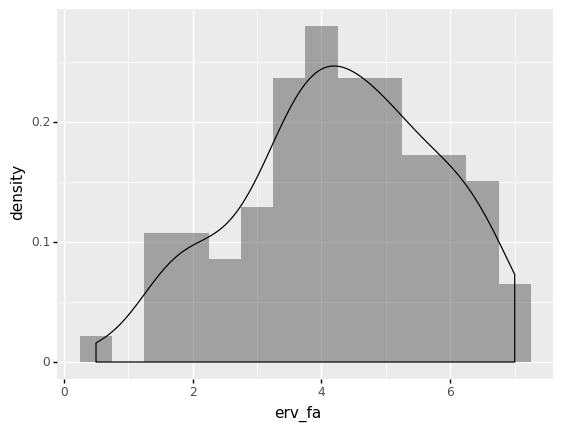

<ggplot: (673191406)>

In [27]:
ggplot(data_2019_clean, aes('erv_fa')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

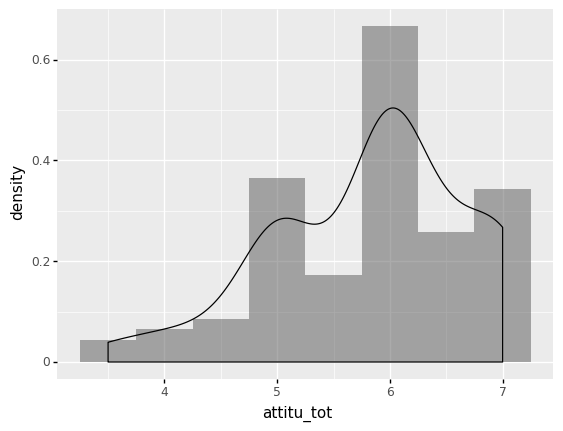

<ggplot: (673235619)>

In [28]:
ggplot(data_2019_clean, aes('attitu_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

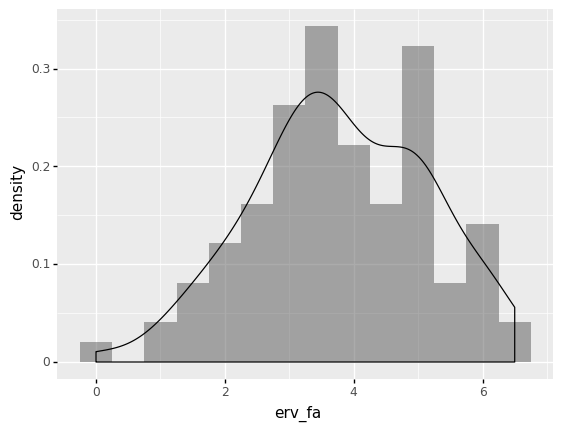

<ggplot: (673318705)>

In [29]:
ggplot(data_2020_clean, aes('erv_fa')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

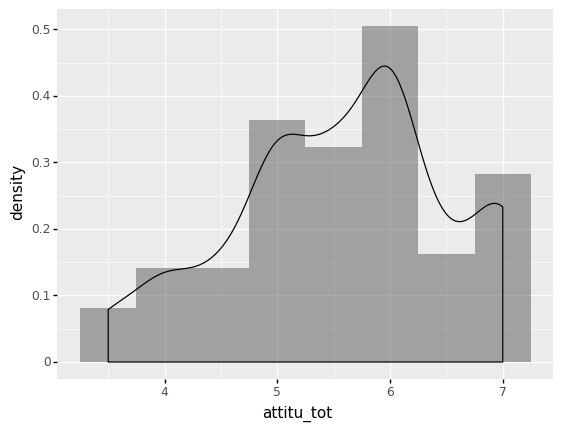

<ggplot: (673292282)>

In [30]:
ggplot(data_2020_clean, aes('attitu_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

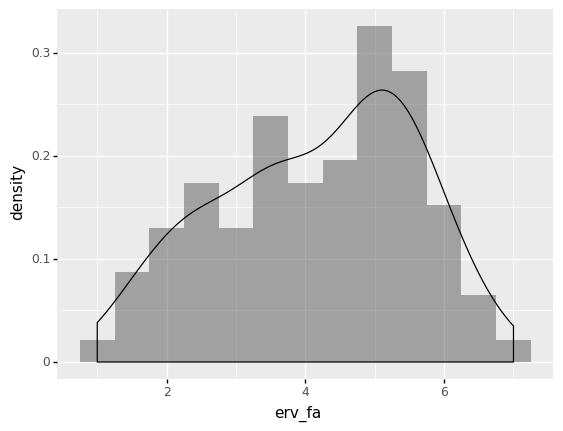

<ggplot: (673403968)>

In [31]:
ggplot(data_2021_clean, aes('erv_fa')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

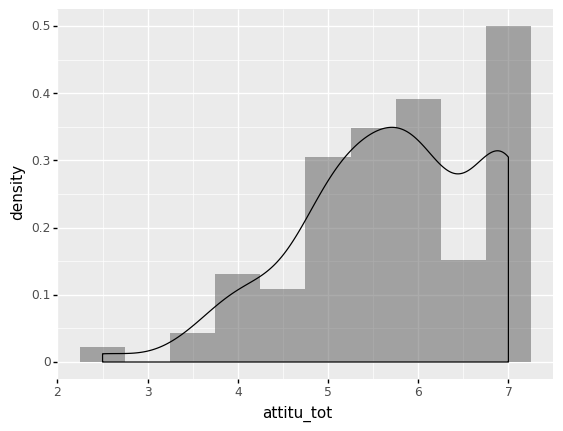

<ggplot: (673442720)>

In [32]:
ggplot(data_2021_clean, aes('attitu_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)

In [33]:
def check_normality(data):
    test_stat_normality, p_value_normality = sp.stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

print('PERCEPTION DATA')
print()

print('Checking normality of the perception data in 2019')
check_normality(data_2019_clean.erv_fa.to_numpy())
print()

print('Checking normality of the perception data in 2020')
check_normality(data_2020_clean.erv_fa.to_numpy())
print()

print('Checking normality of the perception data in 2021')
check_normality(data_2021_clean.erv_fa.to_numpy())
print()

print('ATTITUDE DATA')
print()

print('Checking normality of the attitude data in 2019')
check_normality(data_2019_clean.attitu_tot.to_numpy())
print()

print('Checking normality of the attitude data in 2020')
check_normality(data_2020_clean.attitu_tot.to_numpy())
print()

print('Checking normality of the attitude data in 2021')
check_normality(data_2021_clean.attitu_tot.to_numpy())
print()

PERCEPTION DATA

Checking normality of the perception data in 2019
p value:0.0540
Fail to reject null hypothesis >> The data is normally distributed

Checking normality of the perception data in 2020
p value:0.0883
Fail to reject null hypothesis >> The data is normally distributed

Checking normality of the perception data in 2021
p value:0.0072
Reject null hypothesis >> The data is not normally distributed

ATTITUDE DATA

Checking normality of the attitude data in 2019
p value:0.0000
Reject null hypothesis >> The data is not normally distributed

Checking normality of the attitude data in 2020
p value:0.0003
Reject null hypothesis >> The data is not normally distributed

Checking normality of the attitude data in 2021
p value:0.0000
Reject null hypothesis >> The data is not normally distributed

